<a href="https://colab.research.google.com/github/Avhijit-codeboy/Simple-Linear-Regression/blob/master/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
data = pd.read_csv('sample_data.csv',index_col=0)
x_train = data['Number of Bedrooms'].tolist()
y_train = data['Price (in 10000 rupees)'].tolist()

In [23]:
print(x_train)
print(y_train)

[3, 2, 5, 1]
[40, 30, 60, 20]


In [0]:
def cost_function(number_bedrooms, price, weight, bias):
    observations = len(number_bedrooms)# here number_bedrooms is vector containing the values of number of bedrooms
    								   # the length of this vector is equal to the number of observations present
    								   # in the dataset
    total_error = 0.0
    for i in range(observations):
    	#here price is avector containing our actual output values
        total_error += (price[i] - (weight*number_bedrooms[i] + bias))**2
    return total_error / observations

In [0]:
def update_weights(number_bedrooms, price, weight, bias, learning_rate):
    weight_derivative = 0 # partial derivative of the cost function w.r.t weight
    bias_derivative = 0 # partial derivative of the cost function w.r.t bias
    observations = len(number_bedrooms) # total number of rows in the dataset

    for i in range(observations):
        # Calculate partial derivatives
        # -2x(y - (Wx + B))
        weight_derivative += -2*number_bedrooms[i] * (price[i] - (weight*number_bedrooms[i] + bias))

        # -2(y - (Wx + B))
        bias_derivative += -2*(price[i] - (weight*number_bedrooms[i] + bias))

    # We subtract because the derivatives point in direction of steepest ascent in Gradient Descent
    weight -= (weight_derivative / observations) * learning_rate
    bias -= (bias_derivative / observations) * learning_rate

    return weight, bias

In [0]:
def train(number_bedrooms, price, weight, bias, learning_rate, iters):
    cost_history = []
    weight_history = []
    bias_history = []

    for i in range(iters):
        weight,bias = update_weights(number_bedrooms, price, weight, bias, learning_rate)
        weight_history.append(weight)
        bias_history.append(bias)

        #Calculate cost for debugging purposes
        cost = cost_function(number_bedrooms, price, weight, bias)
        cost_history.append(cost)

    return weight_history, bias_history, cost_history


In [0]:
#initializing parameters
import numpy as np
weight=float(np.random.randint(low=0,high=10,size=1))
bias = 10
alpha = 0.001

In [69]:
weight_history,bias_history,cost_history = train(x_train,y_train,weight,bias,alpha,10)
for i in range(len(a)):
  print("iteration:{} --- weight:{:.2f} --- bias:{:.4f} --- cost:{}".format(i,weight_history[i],bias_history[i],
                                                                            cost_history[i]))

iteration:0 --- weight:8.04 --- bias:10.0110 --- cost:37.375310249999984
iteration:1 --- weight:8.08 --- bias:10.0218 --- cost:35.81840924924779
iteration:2 --- weight:8.11 --- bias:10.0323 --- cost:34.32646848354798
iteration:3 --- weight:8.15 --- bias:10.0426 --- cost:32.89677745972807
iteration:4 --- weight:8.19 --- bias:10.0527 --- cost:31.526738781158322
iteration:5 --- weight:8.22 --- bias:10.0626 --- cost:30.213863428747615
iteration:6 --- weight:8.26 --- bias:10.0722 --- cost:28.955766238841946
iteration:7 --- weight:8.29 --- bias:10.0817 --- cost:27.750161569809844
iteration:8 --- weight:8.32 --- bias:10.0909 --- cost:26.594859149441334
iteration:9 --- weight:8.36 --- bias:10.0999 --- cost:25.487760095615954


In [72]:
updated_weight = weight_history[len(weight_history)-1]# the last index of our weight_history
updated_bias = bias_history[len(bias_history)-1]# the last index of our bias_history
print(updated_weight)
print(updated_bias)

8.355057488468875
10.099934580672457


In [73]:
# predicting new values
def predict_price(number_bedrooms, weight, bias):
    return weight*number_bedrooms + bias

print(predict_price(5,updated_weight,updated_bias))
print(predict_price(7,updated_weight,updated_bias))

51.87522202301683
68.58533699995458


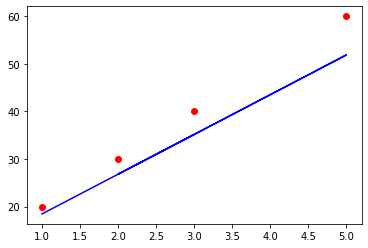

In [77]:
import matplotlib.pyplot as plt
y_predicted = []
for i in range(len(x_train)):
  y_predicted.append(predict_price(x_train[i],updated_weight,updated_bias))

plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,y_predicted,color="blue")
plt.show()